In [15]:
import os
output_stats = "stat.csv"
testing_data = "sudden_drift/"
models = "model_dir/"
obs_percentage = 0.5


# default parameters:
phi = 50
lamb = 2.5
delta = 2.1
threshold = 0.8

os.system("rm -rf ./Feedback")
os.system("rm -rf %s" % output_stats)

real_goal = ""


test_list = []
for item in os.listdir(testing_data):
    if item[0] != ".":
        test_list.append(item)
test_list.sort()

# print(test_list)

counter = 0 

for test_plan in test_list:
    model = test_plan.split(".")[0].split("_")[1]
    if model == "model0":
        real_goal = "g1.pnml"
    if model == "model1":
        real_goal = "g2.pnml"
    test_plan = testing_data + test_plan
    jar = "recognizer.jar"
    
    
    os.popen("java -cp %s Recognizer -w %s %s %s %s %s %s %s %s %s" % (jar, models, test_plan, real_goal, obs_percentage, output_stats, phi, lamb, delta, threshold)).read()          


['01_model0.1', '02_model1.2', '03_model0.3', '04_model1.4', '05_model0.5', '06_model1.6', '07_model0.7', '08_model1.8', '09_model0.9', '10_model1.10', '11_model0.11', '12_model1.12', '13_model0.13', '14_model1.14', '15_model0.15', '16_model1.16', '17_model0.17', '18_model1.18', '19_model0.19', '20_model1.20']


### Show statistics

In [1]:
import os
import subprocess
import numpy as np
import pandas as pd

def func_precision(stringList, answer):
    goal_count = 0
    found = 0
    for result in stringList:
        if result == str(answer):
            found = 1
        goal_count += 1
    return found/(goal_count-1)

def func_recall(stringList, answer):
    found = 0
    for result in stringList:
        if result == str(answer):
            found = 1
            break
    return found

def func_accuracy(total, stringList, answer):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for result in stringList[0:-1]:
        if result == str(answer):
            tp += 1
        else:
            fp += 1
    
    fn = 1 - tp
    
    # total is the number of all goals
    tn = total - tp - fp - fn
    return (tp + tn)/(tn + tp + fp + fn)


def func_bacc(total, stringList, answer):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for result in stringList[0:-1]:
        if result == str(answer):
            tp += 1
        else:
            fp += 1
    
    fn = 1 - tp
    
    # total is the number of all goals
    tn = total - tp - fp - fn

    tpr = tp/(tp + fn)
    tnr = tn/(tn + fp)
    bacc = (tpr + tnr)/2

    return bacc


# return a list of each statistics for every testing case
def calculate_statistics(rows):
    length = rows.shape[0]

    precision = []
    recall = []
    accuracy = []
    b_accuracy = []
        
    for index, row in rows.iterrows():
        
        answer = row["Real_Goal"]
        results = row["Results"].split("/")
        all_candidates = row["Cost"].split("/")
        
        total = len(all_candidates)-1   # the last one is /
        
        p = func_precision(results, answer)
        r = func_recall(results, answer)
        a = func_accuracy(total, results, answer)
        bacc = func_bacc(total, results, answer)
        
        precision.append(p)
        recall.append(r)
        accuracy.append(a)
        b_accuracy.append(bacc)
    
    return precision, recall, accuracy, b_accuracy

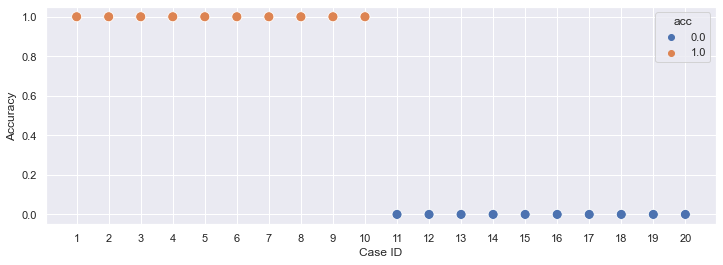

In [43]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("stat.csv")
p, r, a, bacc = calculate_statistics(data)
caseID = list(range(1, 21))
d = {"caseID": caseID, "acc": a}
df = pd.DataFrame(data=d)


# Apply the default theme
# sns.set_theme(style="white")
sns.set(rc = {'figure.figsize':(12,4)})

# Create a visualization
plt.xticks(caseID)
plt.xlabel('Case ID')
plt.ylabel('Accuracy')
# plt.yticks([0, 0.5, 1])
sns.scatterplot(data=df, x="caseID", y="acc", hue="acc", s=100)

plt.savefig('acc_plot.pdf')